# INFINITY WAR and END GAME COMPUTATIONAL ANALYSIS
Danny Chen
Student ID: 1861808

In [1]:
# importing necessary packages
import networkx
import pandas as pd
pd.set_option('max_rows', 400)
import matplotlib.pyplot as plt

#import networkx community
from networkx.algorithms import community

#import seaborn package
import seaborn as sns

**Cleaning Data-- Renaming the Characters to only 1 name** It was kind of a pain and chaining str replacement method wa the most efficient



## infinity war script

In [2]:
iw_script = open('Avengers: Infinity War.txt', mode='r', encoding= 'utf-8').read()
renamed_iw_script = iw_script.replace('Iron Man', 'Tony Stark')\
    .replace('Cap ', 'Steve Rogers')\
    .replace('Cap?', 'Steve Rogers')\
    .replace('Cap.', 'Steve Rogers')\
    .replace('Cap,', 'Steve Rogers')\
    .replace('Captain', 'Steve Rogers')\
    .replace('Captain America', 'Steve Rogers')\
    .replace('Vision] Vision', 'Vision')\
    .replace('Star-Lord', 'Peter Quill')\
    .replace('Ant-Man', 'Scott')\
    .replace('Mr. Lord', 'Peter Quill')\
    .replace('Mr. Stark', 'Tony Stark')\
    .replace('Spider-Man', 'Peter Parker')\
    .replace('the Scarlet Witch', 'Wanda Maximoff')\
    .replace('The Scarlet Witch', 'WANDA MAXIMOFF')\
    .replace('Peter Dinklage', 'Eitri')\
    .replace('Dr. Strange', 'Stephen Strange')\
    .replace('Black Widow','Natasha Romanoff')\
    .replace('Drax:','Drax')\
    .replace('The Black Panther', 'T\'Challa')\
    .replace('Black Panther', 'T\'Challa')\
    .replace('The Winter Soldier', 'Bucky')\
    .replace('Bucky Barnes', 'Bucky')\
    .replace('James \"Bucky\" Buchanan Barnes', 'Bucky')\
    .replace('Bucky', 'Buck')\
    .replace('Bruce Banner', 'Bruce')\
    .replace('Professor Smart Hulk', 'Bruce')\
    .replace('Hulk', 'Bruce')\
    .replace('HULK', 'Bruce')\
    .replace('Banner', 'Bruce')\
    .replace('Dr. Banner', 'Bruce')\
    .replace('Loki:', 'Loki')

# print(renamed_iw_script)

##txt file output below
open('renamed_InfinityWar_Script.txt', mode='w', encoding='utf-8').write(renamed_iw_script)

142360

## end game script

In [3]:
eg_script = open('Avengers: Endgame.txt', mode='r', encoding= 'utf-8').read()
renamed_eg_script = eg_script.replace('Iron Man', 'Tony Stark')\
    .replace('Cap ', 'STEVE ROGERS')\
    .replace('Cap?', 'STEVE ROGERS')\
    .replace('Cap!', 'STEVE ROGERS')\
    .replace('Cap.', 'STEVE ROGERS')\
    .replace('Cap,', 'STEVE ROGERS')\
    .replace('Captain', 'STEVE ROGERS')\
    .replace('Captain America', 'STEVE ROGERS')\
    .replace('CAPTAIN STEVENS', 'STEVE ROGERS')\
    .replace('Cap', 'STEVE ROGERS')\
    .replace('Mr. Rogers', 'STEVE ROGERS')\
    .replace('Steve Rogers', 'STEVE ROGERS')\
    .replace('Rogers', 'STEVE ROGERS')\
    .replace('QUILL', 'PETER QUILL')\
    .replace('PETER PETER QUILL', 'PETER QUILL')\
    .replace('Peter Quill', 'PETER QUILL')\
    .replace('Star-Lord', 'PETER QUILL')\
    .replace('Ant-Man', 'SCOTT')\
    .replace('Scott', 'SCOTT')\
    .replace('Giant-Man', 'HANK PYM')\
    .replace('Mr. Lord', 'PETER QUILL')\
    .replace('Mr. Stark', 'TONY STARK')\
    .replace('Spider-Man', 'PETER PARKER')\
    .replace('the Scarlet Witch', 'WANDA MAXIMOFF')\
    .replace('The Scarlet Witch', 'WANDA MAXIMOFF')\
    .replace('Wanda', 'WANDA MAXIMOFF')\
    .replace('Dr. Strange', 'STRANGE')\
    .replace('Stephen Strange', 'STRANGE')\
    .replace('Doctor Strange', 'STRANGE')\
    .replace('DOCTOR STRANGE', 'STRANGE')\
    .replace('Strange', 'STRANGE')\
    .replace('Black Widow','NATASHA ROMANOFF')\
    .replace('Natasha','NATASHA ROMANOFF')\
    .replace('Clint','CLINT BARTON')\
    .replace('Hawkeye', 'CLINT BARTON')\
    .replace('Drax','DRAX')\
    .replace('The Black Panther', 'T\'Challa')\
    .replace('Black Panther', 'T\'Challa')\
    .replace('BUCKY BARNES', 'BUCK')\
    .replace('Bucky', 'BUCK')\
    .replace('Buck', 'BUCK')\
    .replace('&ndash;', '')\
    .replace('Professor Smart Hulk', 'BRUCE')\
    .replace('BRUCE BANNER', 'BRUCE')\
    .replace('Bruce Banner', 'BRUCE')\
    .replace('Banner', 'BRUCE')\
    .replace('Bruce', 'BRUCE')\
    .replace('Hulky', 'BRUCE')\
    .replace('Hulk', 'BRUCE')\
    .replace('HULK', 'BRUCE')\
    .replace('Big Green', 'BRUCE')\
    .replace('Chitauri', 'chitauri')\
    .replace('Thanos', 'THANOS')\
    .replace('Tree', 'tree')\
    .replace('Steve', 'STEVE ROGERS')\
    .replace('Rogers', 'STEVE ROGERS')\
    .replace('Buddy', 'buddy')

# print(renamed_eg_script)

## txt file output
open('renamed_Endgame_Script.txt', mode='w', encoding='utf-8').write(renamed_eg_script)

139205

## Avengers: Infinity War NETWORK

In [4]:
infinitywar_df = pd.read_csv('IW-Character-Edge-List.csv')

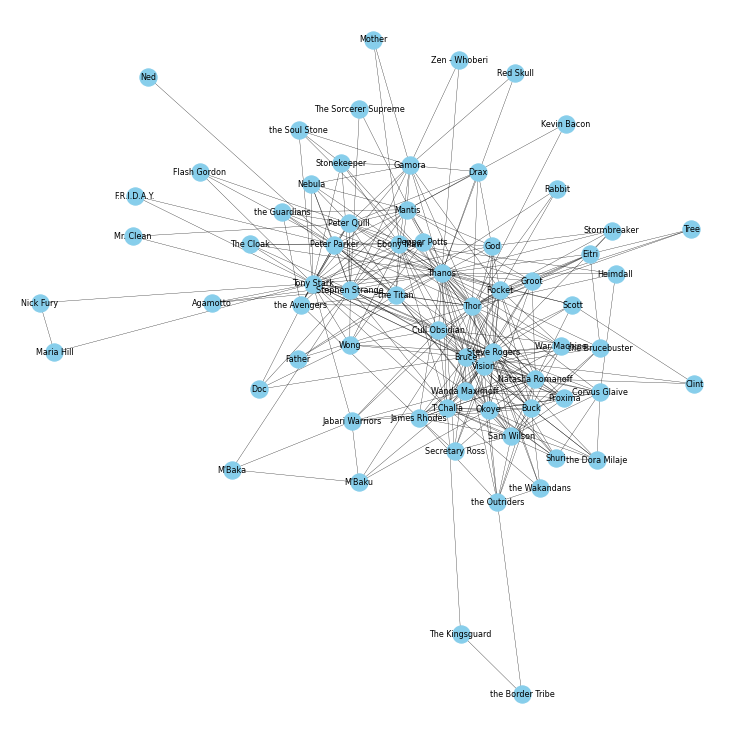

In [5]:
G = networkx.from_pandas_edgelist(infinitywar_df, 'character1', 'character2', 'edge_weight')
networkx.write_graphml(G, 'Avengers-InfinityWar-network.graphml')
plt.figure(figsize=(10,10))
networkx.draw(G, with_labels=True, node_color='skyblue', width=.3, font_size=8)
plt.savefig('IW-Network.png')

In [6]:
# Examining who has the most number of connections in the network?
networkx.degree(G)
degrees = dict(networkx.degree(G)) #makes degree into a dictionary
networkx.set_node_attributes(G, name='degree', values=degrees)

#Constructing pandas dataframe of the node and 
degree_df = pd.DataFrame(G.nodes(data='degree'), columns=['node', 'degree'])
degree_df = degree_df.sort_values(by='degree', ascending=False)
degree_df

,node,degree
2,Thanos,42
3,Tony Stark,31
8,Thor,30
10,Bruce,30
20,Steve Rogers,27
29,T'Challa,23
7,Vision,23
4,Stephen Strange,22
21,Natasha Romanoff,21
5,Peter Parker,19


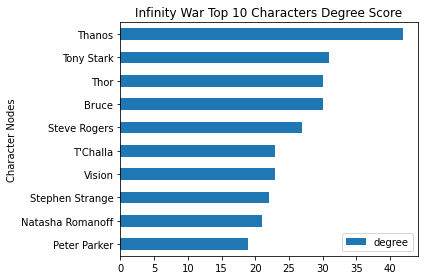

In [7]:
#examine the top 10 character nodes in a barplot
num_nodes_to_inspect = 10
ax = degree_df[:num_nodes_to_inspect].plot(x='node', y='degree', kind='barh', title='Infinity War Top 10 Characters Degree Score').invert_yaxis()
plt.ylabel("Character Nodes")
plt.tight_layout()
plt.savefig('IW-Degree-Barh-Chart.png')

**Weighted**

In [8]:
networkx.degree(G, weight='edge_weight')
weighted_degrees = dict(networkx.degree(G, weight='edge_weight'))
networkx.set_node_attributes(G, name='weighted_degree', values=weighted_degrees)

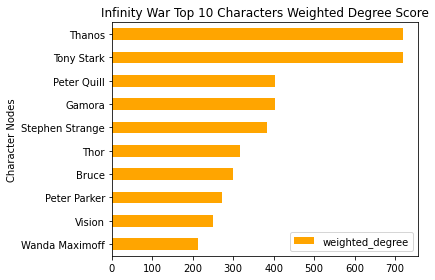

In [9]:
weighted_degree_df = pd.DataFrame(G.nodes(data='weighted_degree'), columns=['node', 'weighted_degree'])
weighted_degree_df = weighted_degree_df.sort_values(by='weighted_degree', ascending=False)
weighted_degree_df

num_nodes_to_inspect = 10
bx = weighted_degree_df[:num_nodes_to_inspect].plot(x='node', y='weighted_degree', color='orange', kind='barh', title='Infinity War Top 10 Characters Weighted Degree Score').invert_yaxis()
plt.ylabel("Character Nodes")
plt.tight_layout()
plt.savefig('IW-Weighted-Barh-Chart.png')

**Betweeness Centrality**

In [10]:
networkx.betweenness_centrality(G)
betweenness_centrality = networkx.betweenness_centrality(G)

In [11]:
networkx.set_node_attributes(G, name='betweenness', values=betweenness_centrality)
betweenness_df = pd.DataFrame(G.nodes(data='betweenness'), columns=['node', 'betweenness'])
betweenness_df = betweenness_df.sort_values(by='betweenness', ascending=False)
betweenness_df

,node,betweenness
2,Thanos,0.224628
3,Tony Stark,0.164489
8,Thor,0.136031
10,Bruce,0.087820
29,T'Challa,0.061696
5,Peter Parker,0.059067
4,Stephen Strange,0.052773
20,Steve Rogers,0.047021
0,Gamora,0.028209
13,Ebony Maw,0.027682


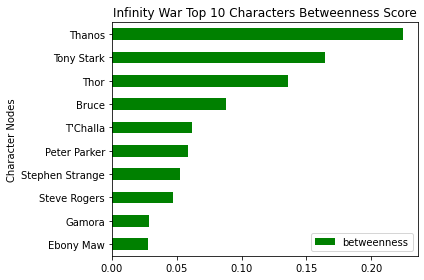

In [12]:
num_nodes_to_inspect = 10
cx = betweenness_df[:num_nodes_to_inspect].plot(x='node', y='betweenness', color='green', kind='barh', title='Infinity War Top 10 Characters Betweenness Score').invert_yaxis()
plt.ylabel("Character Nodes")
plt.tight_layout()
plt.savefig('IW-Betweenness-Barh-Chart.png')

**NOTE**: Thanos is quite impactful in this script which makes sense due to plot points before the blip.

**Communities**

In [13]:
communities = community.greedy_modularity_communities(G)

# Create empty dictionary
modularity_class = {}
#Loop through each community in the network
for community_number, community in enumerate(communities):
    #For each member of the community, add their community number
    for name in community:
        modularity_class[name] = community_number

In [14]:
networkx.set_node_attributes(G, modularity_class, 'modularity_class')

In [15]:
communities_df = pd.DataFrame(G.nodes(data='modularity_class'), columns=['node', 'modularity_class'])
communities_df = communities_df.sort_values(by='modularity_class', ascending=False)
communities_df

,node,modularity_class
12,Eitri,2
63,Tree,2
58,Kevin Bacon,2
8,Thor,2
57,Rabbit,2
54,Stormbreaker,2
19,Groot,2
40,Heimdall,2
46,The Kingsguard,1
29,T'Challa,1


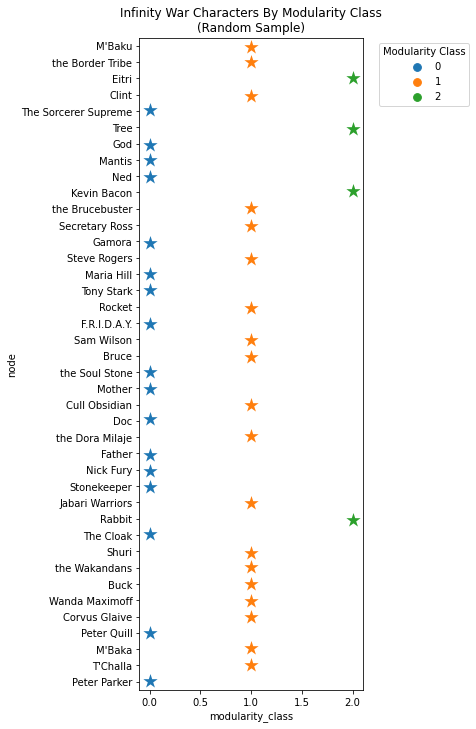

In [16]:
##Plot of communities
#Set figure size
plt.figure(figsize=(4,12))

#Plot a categorical scatter plot from the dataframe communities_df.sample(40)
ax =sns.stripplot(x='modularity_class', y='node', data=communities_df.sample(40),
              hue='modularity_class', marker='*',size=15)
#Set legend outside the plot with bbox_to_anchor
ax.legend(loc='upper right',bbox_to_anchor=(1.5, 1), title='Modularity Class')
ax.set_title("Infinity War Characters By Modularity Class\n(Random Sample)")
plt.show()

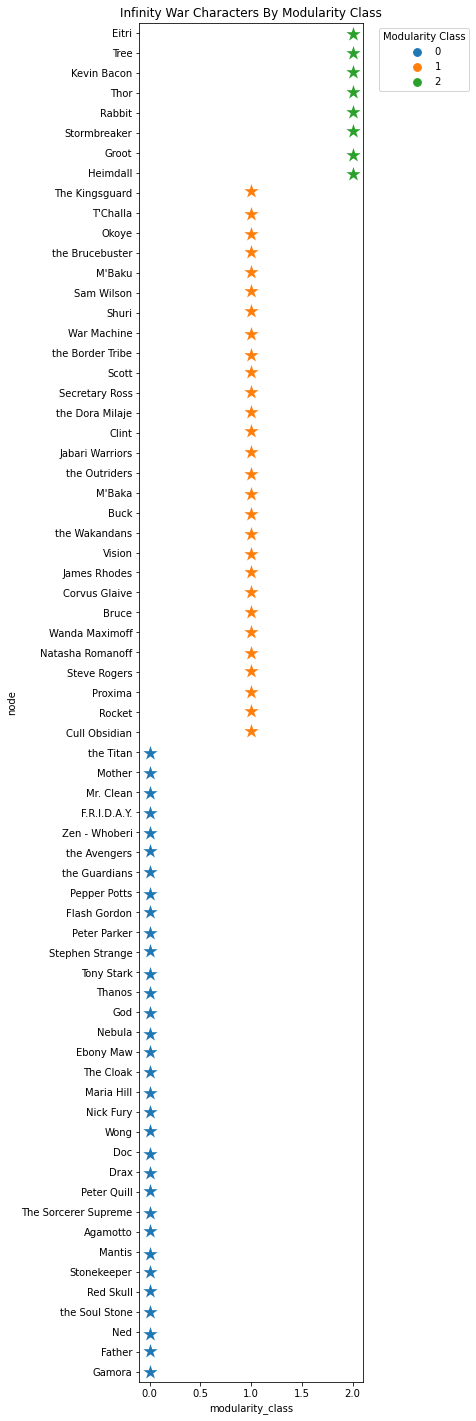

In [17]:
plt.figure(figsize=(4,25))

ax =sns.stripplot(x='modularity_class', y='node', data=communities_df,
              hue='modularity_class', marker='*',size=15)

ax.legend(loc='upper right',bbox_to_anchor=(1.5, 1), title='Modularity Class')
ax.set_title("Infinity War Characters By Modularity Class")
plt.savefig('IW-Communities.png')

**NOTE**: I feel like there isn't any good communities here. They're all grouped in to 3 small communities and community 0 is kind of a catch all for most.

## Avengers: End Game NETWORK


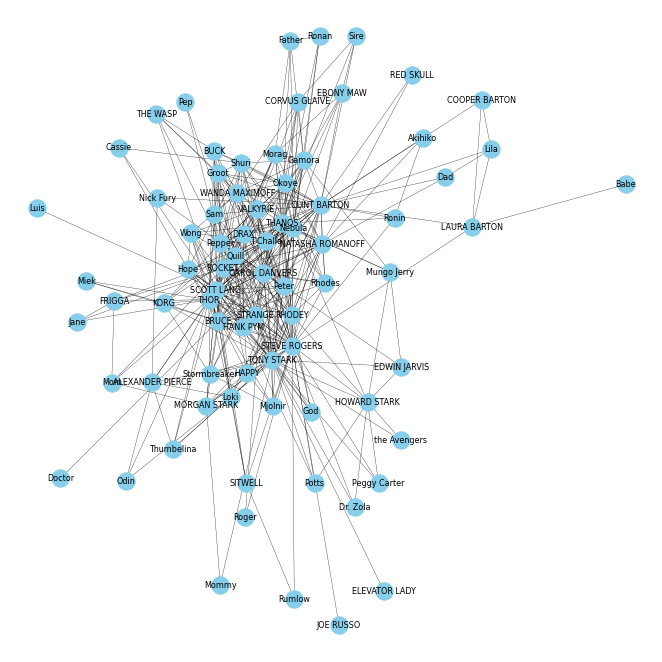

In [18]:
endgame_df = pd.read_csv('EG-Character-Edge-List.csv')
H = networkx.from_pandas_edgelist(endgame_df, 'character1', 'character2', 'edge_weight')
networkx.write_graphml(H, 'Avengers-EndGame-network.graphml')
plt.figure(figsize=(9,9))
networkx.draw(H, with_labels=True, node_color='skyblue', width=.3, font_size=8)
plt.savefig('EG-Network.png')

In [19]:
# Examining who has the most number of connections in the network?
networkx.degree(H)
degrees = dict(networkx.degree(H)) #makes degree into a dictionary
networkx.set_node_attributes(H, name='degree', values=degrees)

#Constructing pandas dataframe of the node and 
degree_df = pd.DataFrame(H.nodes(data='degree'), columns=['node', 'degree'])
degree_df = degree_df.sort_values(by='degree', ascending=False)
degree_df

,node,degree
1,STEVE ROGERS,39
0,TONY STARK,37
8,THOR,36
3,CLINT BARTON,33
7,THANOS,33
9,Nebula,29
2,SCOTT LANG,27
5,BRUCE,26
12,ROCKET,25
18,CAROL DANVERS,24


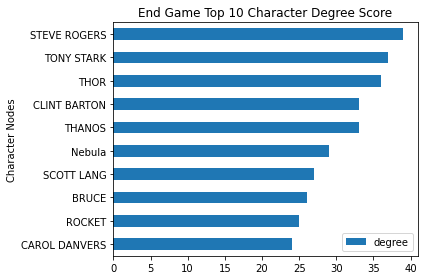

In [20]:
#examine the top 10 character nodes in a barplot
num_nodes_to_inspect = 10
fx = degree_df[:num_nodes_to_inspect].plot(x='node', y='degree', kind='barh', title='End Game Top 10 Character Degree Score').invert_yaxis()
plt.ylabel("Character Nodes")
plt.tight_layout()
plt.savefig('EG-Degree-Barh-Chart.png')

**End Game weighted**

In [21]:
networkx.degree(H, weight='edge_weight')
weighted_degrees = dict(networkx.degree(H, weight='edge_weight'))
networkx.set_node_attributes(H, name='weighted_degree', values=weighted_degrees)

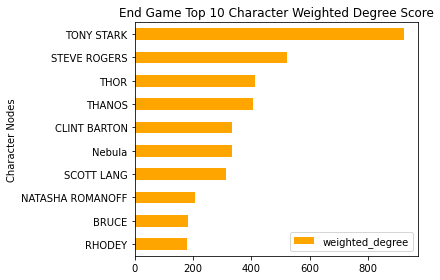

In [22]:
weighted_degree_df = pd.DataFrame(H.nodes(data='weighted_degree'), columns=['node', 'weighted_degree'])
weighted_degree_df = weighted_degree_df.sort_values(by='weighted_degree', ascending=False)
weighted_degree_df

num_nodes_to_inspect = 10
gx =weighted_degree_df[:num_nodes_to_inspect].plot(x='node', y='weighted_degree', color='orange', kind='barh', title='End Game Top 10 Character Weighted Degree Score').invert_yaxis()
plt.ylabel("Character Nodes")
plt.tight_layout()
plt.savefig('EG-Weighted-Barh-Chart.png')

**Endgame betweeness centrality**

In [23]:
networkx.betweenness_centrality(H)
betweenness_centrality = networkx.betweenness_centrality(H)

In [24]:
networkx.set_node_attributes(H, name='betweenness', values=betweenness_centrality)
betweenness_df = pd.DataFrame(H.nodes(data='betweenness'), columns=['node', 'betweenness'])
betweenness_df = betweenness_df.sort_values(by='betweenness', ascending=False)
betweenness_df

,node,betweenness
1,STEVE ROGERS,0.170109
0,TONY STARK,0.159401
3,CLINT BARTON,0.153405
8,THOR,0.109037
7,THANOS,0.078003
2,SCOTT LANG,0.075193
5,BRUCE,0.053727
9,Nebula,0.051374
12,ROCKET,0.035881
18,CAROL DANVERS,0.030545


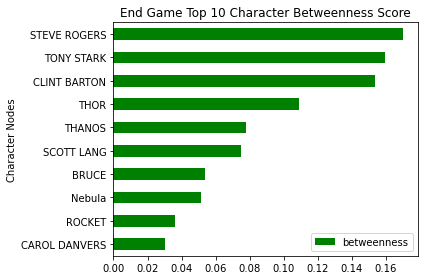

In [25]:
num_nodes_to_inspect = 10
hx = betweenness_df[:num_nodes_to_inspect].plot(x='node', y='betweenness', color='green', kind='barh', title='End Game Top 10 Character Betweenness Score').invert_yaxis()
plt.ylabel("Character Nodes")
plt.tight_layout()
plt.savefig('EG-Betweenness-Chart.png')

**End Game communities**

In [27]:
#import networkx community
from networkx.algorithms import community

#import seaborn package
import seaborn as sns

In [28]:
communities = community.greedy_modularity_communities(H)

# Create empty dictionary
modularity_class = {}
#Loop through each community in the network
for community_number, community in enumerate(communities):
    #For each member of the community, add their community number
    for name in community:
        modularity_class[name] = community_number

In [29]:
networkx.set_node_attributes(H, modularity_class, 'modularity_class')
communities_df = pd.DataFrame(H.nodes(data='modularity_class'), columns=['node', 'modularity_class'])
communities_df = communities_df.sort_values(by='modularity_class', ascending=False)
communities_df

,node,modularity_class
27,Stormbreaker,5
53,CORVUS GLAIVE,5
19,KORG,5
47,Miek,5
71,Sire,5
7,THANOS,5
26,Mjolnir,5
31,EBONY MAW,5
37,RED SKULL,4
48,Dad,4


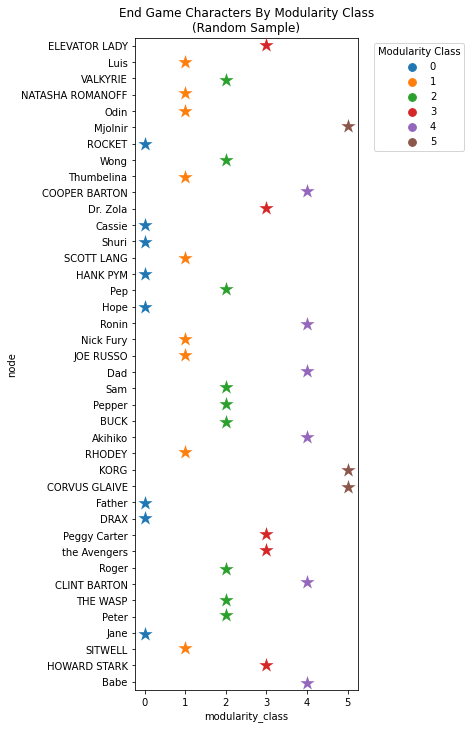

In [30]:
##Plot of communities
#Set figure size
plt.figure(figsize=(4,12))

#Plot a categorical scatter plot from the dataframe communities_df.sample(40)
ax =sns.stripplot(x='modularity_class', y='node', data=communities_df.sample(40),
              hue='modularity_class', marker='*',size=15)
#Set legend outside the plot with bbox_to_anchor
ax.legend(loc='upper right',bbox_to_anchor=(1.5, 1), title='Modularity Class')
ax.set_title("End Game Characters By Modularity Class\n(Random Sample)")
plt.show()

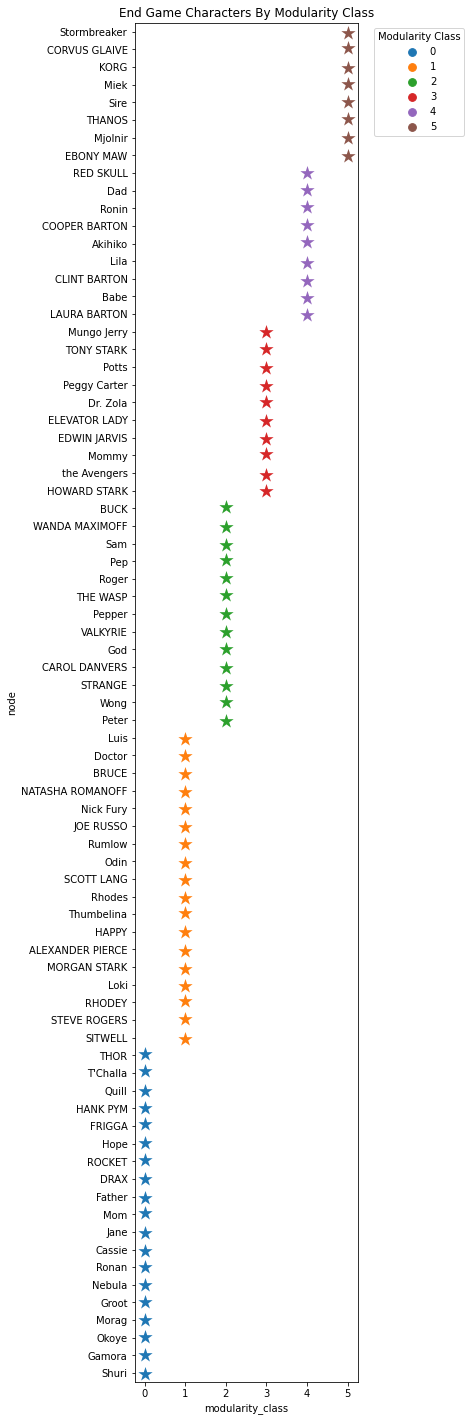

In [31]:
plt.figure(figsize=(4,25))

ax =sns.stripplot(x='modularity_class', y='node', data=communities_df,
              hue='modularity_class', marker='*',size=15)

ax.legend(loc='upper right',bbox_to_anchor=(1.5, 1), title='Modularity Class')
ax.set_title("End Game Characters By Modularity Class")
plt.savefig('EG-Communities.png')

In [32]:
communities_df[communities_df['modularity_class'] == 4]

,node,modularity_class
37,RED SKULL,4
48,Dad,4
21,Ronin,4
65,COOPER BARTON,4
22,Akihiko,4
23,Lila,4
3,CLINT BARTON,4
75,Babe,4
36,LAURA BARTON,4


This seems interesting because  this network is connects back to Hawkeye/Clint Barton.

In [33]:
communities_df[communities_df['modularity_class'] == 3]

,node,modularity_class
32,Mungo Jerry,3
0,TONY STARK,3
42,Potts,3
52,Peggy Carter,3
58,Dr. Zola,3
67,ELEVATOR LADY,3
72,EDWIN JARVIS,3
50,Mommy,3
76,the Avengers,3
15,HOWARD STARK,3


This is all centralized around Tony Stark/Iron Man with a few references like Mungo Jerry because the Elevator lady mentioned it while Cap and him were at the military base.